In [18]:
from requests import get
from bs4 import BeautifulSoup
import nltk
from nltk import FreqDist
nltk.download('stopwords') # run this one time
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy
import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/clairewillett/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
url = ''
response = get(url)

In [3]:
html_soup = BeautifulSoup(response.text, 'html.parser')

In [4]:
comments = html_soup.find_all('div', class_ = 'comment-text triangle-border top')

In [6]:
commentlist = []
for comment in comments:
    commentp = comment.p.text 
    commentlist.append(commentp)
    

In [10]:
authors = html_soup.find_all('cite', class_ = 'fn')
authorlist = []
for a in authors:
    authorlist.append(a.text)
   
    

In [62]:
test_df = pd.DataFrame({'comment': commentlist,
'author': authorlist
})

In [112]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(10,8))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.xticks(rotation=45)
  plt.show()

In [102]:
# remove unwanted characters, numbers and symbols
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [92]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

In [108]:
# remove short words (length < 3)
test_df['comment'] = test_df['comment'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in test_df['comment']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

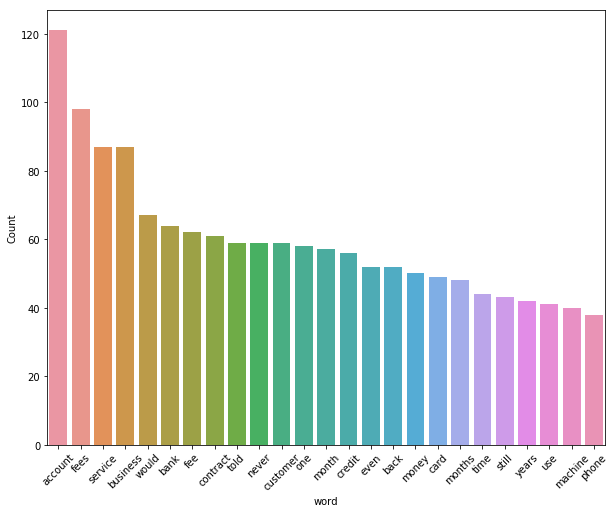

In [113]:
freq_words(reviews, 25)

In [115]:
from __future__ import unicode_literals

In [116]:
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

In [118]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
reviews_2 = lemmatization(tokenized_reviews)

[u'great', u'selling', u'prologue', u'follow', u'service', u'month', u'documentation', u'place', u'many', u'call', u'email', u'response', u'someone', u'problem', u'document', u'monthly', u'charge', u'contract', u'email', u'phone', u'call', u'month', u'speak', u'someone', u'credit', u'account', u'portion', u'extra', u'fee', u'promise', u'system', u'correct', u'charge', u'credit', u'bank', u'account', u'system', u'email', u'unanswered', u'put', u'stop', u'payment', u'pre', u'authorized', u'debit', u'nothing', u'bad']


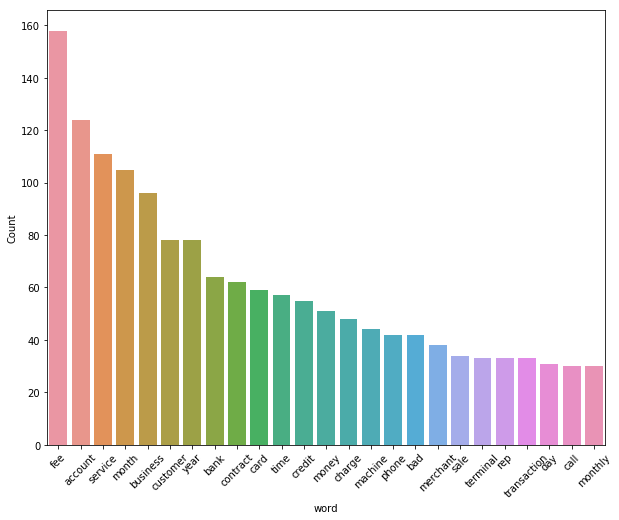

In [119]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

test_df['reviews'] = reviews_3

freq_words(test_df['reviews'], 25)

In [74]:
dictionary = corpora.Dictionary(reviews_2)

In [75]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]

In [82]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=5, random_state=100,
                chunksize=1000, passes=50)

In [84]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
0      29.975565        1       1  0.040544  0.054371
2      22.526530        1       2 -0.011776  0.024827
4      17.481945        1       3  0.066708  0.021958
1      15.334967        1       4  0.022220 -0.109227
3      14.680992        1       5 -0.117696  0.008070, topic_info=     Category        Freq        Term       Total  loglift  logprob
term                                                               
509   Default   91.000000     service   91.000000  30.0000  30.0000
119   Default   20.000000         new   20.000000  29.0000  29.0000
863   Default   18.000000        bill   18.000000  28.0000  28.0000
437   Default   27.000000         rep   27.000000  27.0000  27.0000
706   Default   36.000000         bad   36.000000  26.0000  26.0000
818   Default   24.000000     monthly   24.000000  25.0000  25.0000
195   Default   25.000000        call   25.000000  24.0000  24.0000
89    Default   10.000000        cost   10.000000  23.0000  23.0000
185   Default  128.000000         fee  128.000000  22.0000  22.0000
1205  Default   20.000000     problem   20.000000  21.0000  21.0000
183   Default   27.000000    terminal   27.000000  20.0000  20.0000
514   Default   15.000000      system   15.000000  19.0000  19.0000
1243  Default   16.000000  department   16.000000  18.0000  18.0000
846   Default   11.000000        fund   11.000000  17.0000  17.0000
553   Default    5.000000      matter    5.000000  16.0000  16.0000
516   Default   17.000000      anyone   17.000000  15.0000  15.0000
214   Default   34.000000       phone   34.000000  14.0000  14.0000
596   Default   22.000000   equipment   22.000000  13.0000  13.0000
469   Default   48.000000        card   48.000000  12.0000  12.0000
899   Default   15.000000         pay   15.000000  11.0000  11.0000
8     Default   10.000000      global   10.000000  10.0000  10.0000
749   Default   15.000000       email   15.000000   9.0000   9.0000
907   Default    4.000000  chargeback    4.000000   8.0000   8.0000
11    Default   86.000000       month   86.000000   7.0000   7.0000
1089  Default   78.000000    business   78.000000   6.0000   6.0000
38    Default   31.000000    merchant   31.000000   5.0000   5.0000
965   Default   42.000000       money   42.000000   4.0000   4.0000
210   Default  129.000000     company  129.000000   3.0000   3.0000
357   Default   27.000000        sale   27.000000   2.0000   2.0000
613   Default    9.000000        what    9.000000   1.0000   1.0000
...       ...         ...         ...         ...      ...      ...
818    Topic5    9.163697     monthly   24.451994   0.9372  -4.4487
142    Topic5    3.179649       great    6.970737   1.1337  -5.5072
774    Topic5    6.596247        many   19.030804   0.8591  -4.7775
183    Topic5    7.517438    terminal   27.581782   0.6187  -4.6468
1049   Topic5    3.924948         old    9.528700   1.0317  -5.2966
11     Topic5   14.497357       month   86.433508   0.1332  -3.9900
227    Topic5   15.567069     account  101.348827   0.0452  -3.9188
985    Topic5    6.189200         day   25.557647   0.5005  -4.8412
749    Topic5    4.693423       email   15.454100   0.7269  -5.1178
185    Topic5   13.783074         fee  128.179683  -0.3114  -4.0405
884    Topic5    5.242893        good   20.617436   0.5494  -5.0071
622    Topic5    4.689558     nothing   16.719128   0.6474  -5.1187
278    Topic5    6.966435     machine   36.054238   0.2747  -4.7229
611    Topic5    2.588918       price    5.415778   1.1805  -5.7127
195    Topic5    5.674225        call   25.527653   0.4148  -4.9281
965    Topic5    7.271451       money   42.282203   0.1582  -4.6800
390    Topic5    7.868542        bank   53.564156   0.0006  -4.6011
226    Topic5    8.374585    customer   63.793326  -0.1118  -4.5388
424    Topic5    8.298390        year   64.541203  -0.1326  -4.5479
210    Topic5   10.299958     company  129.